In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import shutil
from sklearn.model_selection import train_test_split


In [13]:
import os
import shutil
import random
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Caminho para o diretório do dataset
dataset_dir = 'C:/Users/igorc/datasetnovo/datasetcrop'
extensao_arquivo = '.jpg'  # Ajuste para a extensão correta dos seus arquivos

# Definir proporções para treino, validação e teste
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Classes do dataset
classes = ['AzulCrop', 'AmareloCrop', 'VermelhoCrop', 'NoneCrop']

# Diretório de saída
output_dir = r'C:/Users/igorc/datasetnovo'

# Função para criar diretórios de treino, validação e teste para cada classe
def criar_diretorios(base_dir, classes):
    for classe in classes:
        os.makedirs(os.path.join(base_dir, 'train', classe), exist_ok=True)
        os.makedirs(os.path.join(base_dir, 'val', classe), exist_ok=True)
        os.makedirs(os.path.join(base_dir, 'test', classe), exist_ok=True)

# Função para aplicar data augmentation
def augment_image(image):
    augmentations = [lambda x: x,  # No augmentation
                     lambda x: x.rotate(15),  # Rotate 15 degrees
                     lambda x: x.rotate(-15),  # Rotate -15 degrees
                     lambda x: x.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal flip
                     lambda x: ImageEnhance.Brightness(x).enhance(1.5),  # Increase brightness
                     lambda x: ImageEnhance.Brightness(x).enhance(0.5)]  # Decrease brightness

    augmentation = random.choice(augmentations)
    return augmentation(image)

# Função para copiar e aumentar arquivos para o diretório de destino
def copiar_e_aumentar_arquivos(files, dest_dir, classe):
    for file in files:
        src_path = os.path.join(dataset_dir, classe, file)
        dest_path = os.path.join(dest_dir, classe, file)
        
        # Abrir imagem e aplicar data augmentation
        image = Image.open(src_path)
        augmented_image = augment_image(image)
        
        # Salvar imagem aumentada no diretório de destino
        augmented_image.save(dest_path)
        print(f"Copiado e aumentado: {file} para {dest_dir}/{classe}")

# Criar diretórios para treino, validação e teste para cada classe
criar_diretorios(output_dir, classes)

# Processar cada classe separadamente
for classe in classes:
    # Listar todos os arquivos no diretório da classe
    classe_dir = os.path.join(dataset_dir, classe)
    arquivos = os.listdir(classe_dir)

    # Filtrar apenas os arquivos com a extensão especificada
    arquivos = [arquivo for arquivo in arquivos if arquivo.endswith(extensao_arquivo)]

    # Verificar se há arquivos suficientes para dividir em treino, validação e teste
    if len(arquivos) > 1:
        # Dividir os arquivos em treino, validação e teste
        train_files, temp_files = train_test_split(arquivos, test_size=(1 - train_ratio), random_state=42)
        if len(temp_files) > 1:
            val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)
        else:
            val_files, test_files = temp_files, []

        # Copiar e aumentar arquivos para os diretórios de treino, validação e teste
        copiar_e_aumentar_arquivos(train_files, os.path.join(output_dir, 'train'), classe)
        if val_files:
            copiar_e_aumentar_arquivos(val_files, os.path.join(output_dir, 'val'), classe)
        if test_files:
            copiar_e_aumentar_arquivos(test_files, os.path.join(output_dir, 'test'), classe)
    else:
        print(f"Não há arquivos suficientes na classe {classe} para dividir.")

print("Separação e aumento concluídos.")

# Transformação usada no dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Carregar os datasets para treino, validação e teste
train_dataset = datasets.ImageFolder(root=os.path.join(output_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(output_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(output_dir, 'test'), transform=transform)
#print(train_dataset)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)
print((train_loader.dataset ))



Copiado e aumentado: 20240628-150700.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150643.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150628.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150633.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150648.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150634.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150644.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150641.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150658.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150629.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: 20240628-150630.jpg para C:/Users/igorc/datasetnovo\train/AzulCrop
Copiado e aumentado: Azul1.jpg p

Tamanho da imagem original: (200, 200)
Tamanho do tensor da imagem transformada: torch.Size([3, 32, 32])


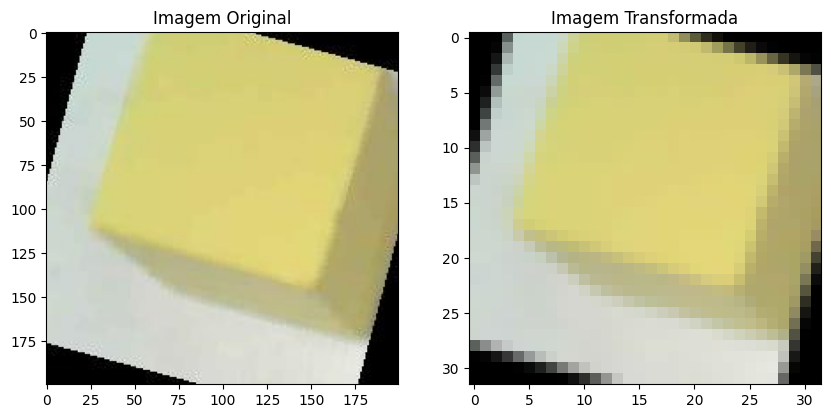

In [67]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

# Função para desserializar tensor e normalizar a imagem
def imshow(img):
    img = img / 2 + 0.5  # desserializar e normalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Transformação usada no dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Pegar a primeira imagem do dataset
img_path = train_dataset.imgs[0][0]
original_img = Image.open(img_path)

# Verificar se a imagem está em RGB, caso contrário converter
if original_img.mode != 'RGB':
    original_img = original_img.convert('RGB')

# Aplicar a transformação
transformed_img = transform(original_img)

# Exibir a imagem original e a imagem transformada
print("Tamanho da imagem original:", original_img.size)
print("Tamanho do tensor da imagem transformada:", transformed_img.size())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(original_img)

plt.subplot(1, 2, 2)
plt.title("Imagem Transformada")
imshow(transformed_img)

plt.show()



In [26]:
class ColorClassifier(nn.Module):
    def __init__(self):
        super(ColorClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 4)  # 4 classes: ['azul', 'amarelo', 'vermelho', 'none']

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(-1, 32 * 6 * 6)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

model = ColorClassifier()

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim

# Configurações
batch_size = 2
num_epochs = 50
learning_rate = 0.001

# Inicializar o modelo, critério de perda e otimizador
model = ColorClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Treinamento
best_train_loss = float('inf')  # Melhor perda de treinamento inicial
best_model_path = 'best_model.pth'  # Caminho para salvar o melhor modelo

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)

    # Salvar o modelo se a perda de treinamento melhorar
    if train_loss < best_train_loss:
        best_train_loss = train_loss
        torch.save(model.state_dict(), best_model_path)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

print(f'O melhor modelo foi salvo em: {best_model_path}')


Epoch [1/50], Train Loss: 1.9650
Epoch [2/50], Train Loss: 1.4081
Epoch [3/50], Train Loss: 1.4054
Epoch [4/50], Train Loss: 1.3541
Epoch [5/50], Train Loss: 1.2737
Epoch [6/50], Train Loss: 1.2893
Epoch [7/50], Train Loss: 1.0743
Epoch [8/50], Train Loss: 0.8556
Epoch [9/50], Train Loss: 0.5001
Epoch [10/50], Train Loss: 0.4660
Epoch [11/50], Train Loss: 0.3209
Epoch [12/50], Train Loss: 0.2073
Epoch [13/50], Train Loss: 0.2713
Epoch [14/50], Train Loss: 0.2308
Epoch [15/50], Train Loss: 0.0954
Epoch [16/50], Train Loss: 0.0963
Epoch [17/50], Train Loss: 0.0533
Epoch [18/50], Train Loss: 0.0404
Epoch [19/50], Train Loss: 0.0347
Epoch [20/50], Train Loss: 0.0263
Epoch [21/50], Train Loss: 0.0229
Epoch [22/50], Train Loss: 0.0179
Epoch [23/50], Train Loss: 0.0160
Epoch [24/50], Train Loss: 0.0138
Epoch [25/50], Train Loss: 0.0096
Epoch [26/50], Train Loss: 0.0082
Epoch [27/50], Train Loss: 0.0075
Epoch [28/50], Train Loss: 0.0048
Epoch [29/50], Train Loss: 0.0038
Epoch [30/50], Train Lo

In [27]:
# Caminho do diretório do dataset de teste
test_dir = r'C:\Users\igorc\datasetnovo\test'

# Carregar o dataset de teste
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Carregar o modelo treinado
model = ColorClassifier()
best_model_path = r'C:\Users\igorc\Downloads\TempoReal\best_model.pth'  # Certifique-se de que este caminho é válido
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Avaliação no conjunto de teste
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy: {100 * correct / total}%')


Accuracy: 95.0%


In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import datasets, transforms

# Função para desserializar tensor e normalizar a imagem
def imshow(img):
    img = img / 2 + 0.5  # desserializar e normalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Transformação usada no dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Carregar o dataset para obter as classes
train_dataset = datasets.ImageFolder(root='C:/Users/igorc/datasetpytorch/train', transform=transform)
classes = train_dataset.classes

# Função para carregar e transformar a imagem
def load_image(image_path):
    original_img = Image.open(image_path)
    if original_img.mode != 'RGB':
        original_img = original_img.convert('RGB')
    transformed_img = transform(original_img)
    return original_img, transformed_img

# Caminho da imagem para testar
image_path = 'C:/Users/igorc/datasetpytorch/test/none/none21.png'  # Certifique-se de que a extensão do arquivo esteja correta

# Carregar e transformar a imagem
original_img, transformed_img = load_image(image_path)

# Inicializar e carregar o modelo treinado
class ColorClassifier(nn.Module):
    def __init__(self):
        super(ColorClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 4)  # 4 classes: azul, amarelo, vermelho, none

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(-1, 32 * 6 * 6)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Carregar o melhor modelo salvo
model = ColorClassifier()
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Fazer a previsão com a rede treinada
with torch.no_grad():
    output = model(transformed_img.unsqueeze(0))  # Adiciona uma dimensão para o batch
    _, predicted = torch.max(output.data, 1)
    predicted_label = predicted.item()

# Exibir a imagem e a previsão
print(f'Previsão do modelo: {classes[predicted_label]}')

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(original_img)

plt.subplot(1, 2, 2)
plt.title(f"Previsão: {classes[predicted_label]}")
imshow(transformed_img)

plt.show()

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'C:/Users/igorc/datasetpytorch/train'